AttributeError: 'GeoAxesSubplot' object has no attribute '_autoscaleXon'

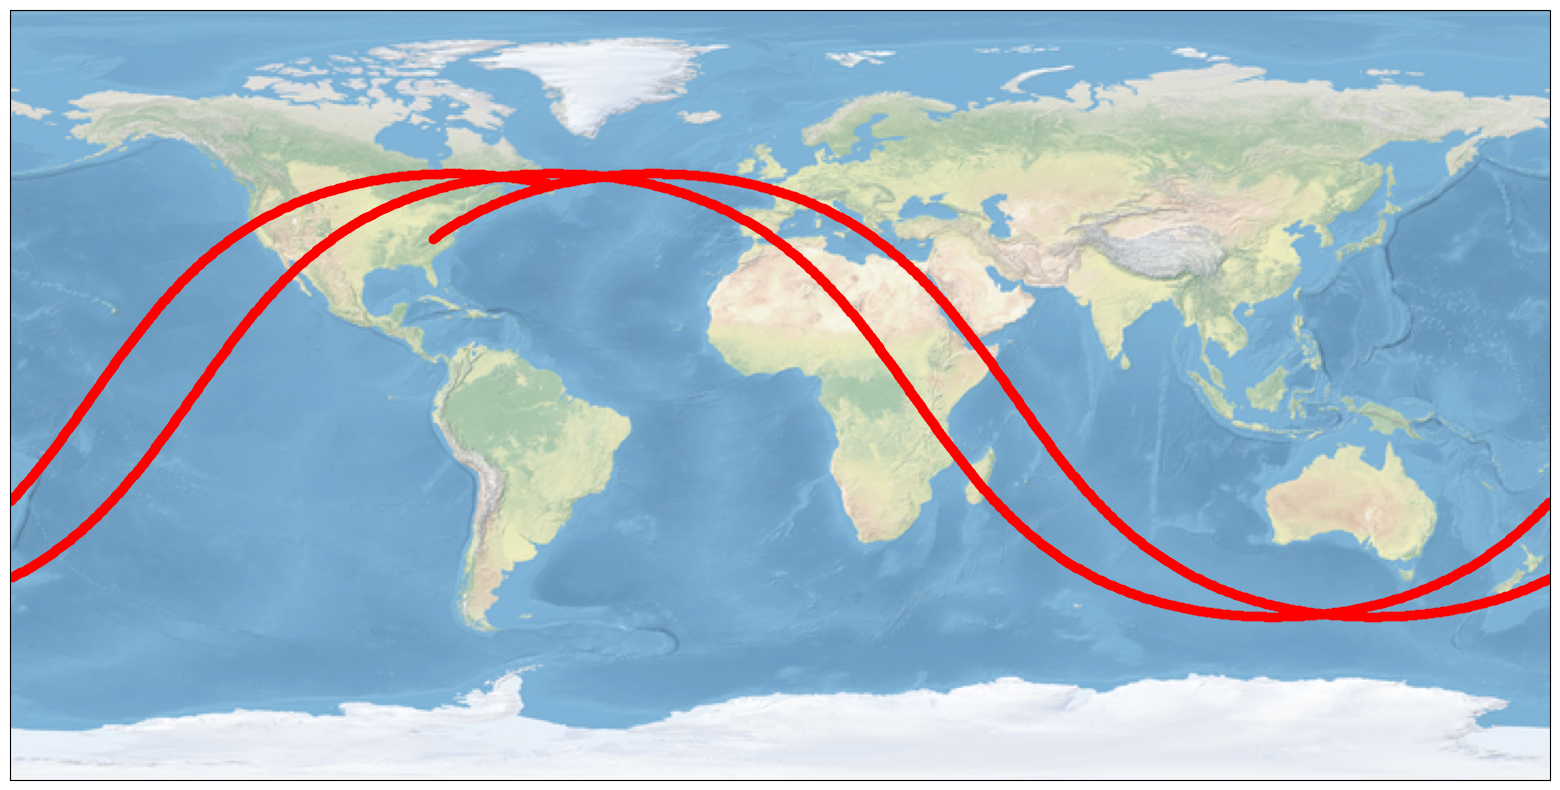

In [1]:
from skyfield.api import load, EarthSatellite
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ts = load.timescale(builtin=True)

TLE = """ISS (ZARYA)             
1 25544U 98067A   19203.81086311  .00000606  00000-0  18099-4 0  9996
2 25544  51.6423 184.5274 0006740 168.1171 264.4057 15.50995519180787"""

name, L1, L2 = TLE.splitlines()

sat = EarthSatellite(L1, L2)

minutes = np.arange(0, 200, 0.1) # about two orbits
times   = ts.utc(2019, 7, 23, 0, minutes)

geocentric = sat.at(times)
subsat = geocentric.subpoint()

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.stock_img()

plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, transform=ccrs.PlateCarree(),
            color='red')
plt.show()